In [22]:
!python -m spacy download en_core_web_md
!pip show en_core_web_md

import spacy

nlp = spacy.load('en_core_web_md')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 6.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Name: en-core-web-md
Version: 3.7.1
Summary: English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
Home-page: https://explosion.ai
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: spacy
Required-by: 


In [23]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
from keras.optimizers import SGD
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import random
import json
import pickle

Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 1.6416 - accuracy: 0.2105 - val_loss: 1.6089 - val_accuracy: 0.1724
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 1.6050 - accuracy: 0.1930 - val_loss: 1.5546 - val_accuracy: 0.3103
Epoch 3/50
46/46 [==============================] - 0s 5ms/step - loss: 1.5708 - accuracy: 0.3026 - val_loss: 1.5121 - val_accuracy: 0.5000
Epoch 4/50
46/46 [==============================] - 0s 5ms/step - loss: 1.5170 - accuracy: 0.3947 - val_loss: 1.4689 - val_accuracy: 0.5862
Epoch 5/50
46/46 [==============================] - 0s 5ms/step - loss: 1.4741 - accuracy: 0.4035 - val_loss: 1.4213 - val_accuracy: 0.6552
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 1.4270 - accuracy: 0.4737 - val_loss: 1.3689 - val_accuracy: 0.6897
Epoch 7/50
46/46 [==============================] - 0s 5ms/step - loss: 1.3801 - accuracy: 0.5000 - val_loss: 1.3087 - val_accuracy: 0.7069
Epoch 8/50
46/46 [==

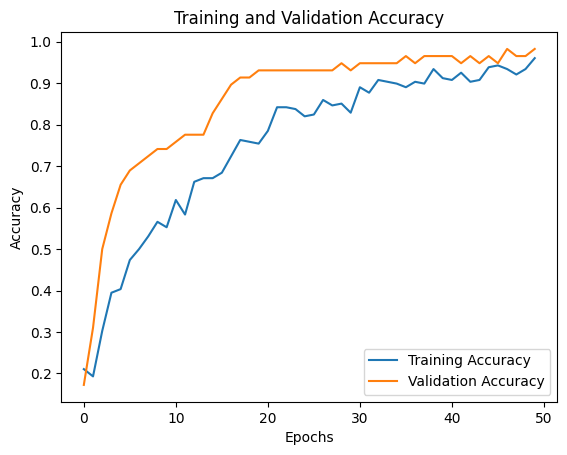

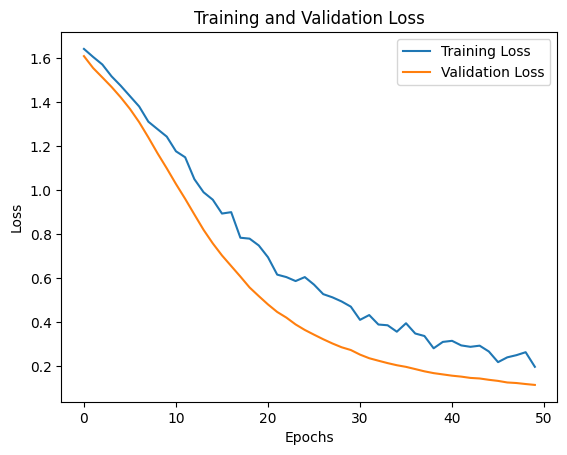

In [26]:
#Loading the intents data
intents = json.loads(open('/content/drive/MyDrive/AIML/intents.json').read())

#Extract Intents and Tags
words = []
classes = []
documents = []
IgnoredWordsList = [".", "?", "!", ","]

for intent in intents['intents']:
    for pattern in intent['patterns']:
        doc = nlp(pattern)
        words.extend(token.lemma_ for token in doc if token.text not in IgnoredWordsList)
        documents.append(([token.text for token in doc], intent["tag"]))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

#Removing duplicates and sorting
words = sorted(set(words))
classes = sorted(set(classes))

#Create training data
training = []
output_empty = [0] * len(classes)

#Bag of Words Vectorization Method
for document in documents:
    pattern_words = [token.lemma_.lower() for word in document[0] for token in nlp(word)]
    bag = [1 if word in pattern_words else 0 for word in words]
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append((bag, output_row))


np.random.shuffle(training)

#Splitting training and test data
train_data, test_data = train_test_split(training, test_size=0.2, random_state=42)

#Converting training and test data to NumPy arrays
X_train = np.array([data[0] for data in train_data])
y_train = np.array([data[1] for data in train_data])
X_test = np.array([data[0] for data in test_data])
y_test = np.array([data[1] for data in test_data])

#Building the model
model = keras.Sequential([
    layers.Dense(128, input_shape=(len(X_train[0]),), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(y_train[0]), activation='softmax')
])

sgd = SGD(lr = 0.1, momentum = 0.9, nesterov = True)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=5, verbose=1)

#Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 10ms/step - loss: 0.1778 - accuracy: 0.9483
Test Loss: 0.17782677710056305
Test Accuracy: 0.9482758641242981


In [ ]:
pickle.dump(words, open('/content/drive/MyDrive/AIML/words.pkl', 'wb'))
pickle.dump(classes, open('/content/drive/MyDrive/AIML/classes.pkl', 'wb'))

pickle.dump(model, open('/content/drive/MyDrive/AIML/intents_model.pkl', 'wb'))

In [ ]:
print(classes)

['Order', 'Recommendations', 'greetings', 'report', 'reservation']
